In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
data_path = r'D:\projects\PNET Radiomics\data'
excel_file_names = ["JayaFeaturesTrainPrepared"]
excel_file_names_val = ["JayaFeaturesTestPrepared"]
outcome_column = "Grade"
exclude_columns = ["Patient_ID"]
exclude_columns_val = ["Case_ID"]
categorical_columns = []
CORR_THRESH = 0.8

In [39]:
features_file = os.path.join(data_path, "JayaFeaturesTrainPrepared.xlsx")

In [40]:
df = pd.read_excel(features_file)

# Exploratory data analysis

In [41]:
df.shape

(140, 1787)

In [42]:
df.head()

,Patient_ID,B,C,D,E,F,G,H,I,J,...,BPJ,BPK,BPL,BPM,BPN,BPO,BPP,BPQ,BPR,Grade
0,pnet_ID103,0.019971,4.674423,0.643856,7.133954,0.424301,15.396680,23.861394,4.180965,6.203608,...,1.934180,1.809359,1.795336,2.316759,1.707493,1.016517,1.047146,1.966275,1.757150,0
1,pnet_ID104,0.017621,9.063771,0.229503,5.908549,0.338557,13.581278,14.570426,3.913887,6.265841,...,7.235115,1.573164,1.745530,1.476111,3.366901,5.047500,2.914128,4.132618,7.958190,1
2,pnet_ID106,0.048893,2.377996,0.710708,4.267037,0.572845,21.266012,14.690150,3.700250,5.120612,...,5.159726,1.896011,1.868298,1.975207,3.499734,5.623181,3.972170,1.758370,2.160812,0
3,pnet_ID107,0.039014,2.278861,0.579593,2.720823,0.539726,11.083248,8.604429,3.566120,5.181799,...,3.855913,9.872760,6.901150,6.019608,3.142958,2.230124,2.028867,3.308086,6.282231,1
4,pnet_ID108,0.025233,3.377998,0.704413,5.730004,0.481675,20.440826,19.542018,4.052760,5.812858,...,1.916132,1.999057,2.177197,1.416979,1.876469,1.932155,1.933796,2.040655,1.560621,0


* We can see the train data has 140 patients and 1785 radiomics featuers. These features are unknown:

In [43]:
columns = df.columns
columns

Index(['Patient_ID', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       ...
       'BPJ', 'BPK', 'BPL', 'BPM', 'BPN', 'BPO', 'BPP', 'BPQ', 'BPR', 'Grade'],
      dtype='object', length=1787)

* We define a function to remove correlated features:

In [44]:
def remove_collinear_features(df, threshold):
    """
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold.
    :param x: features dataframe
    :param threshold: features with correlations greater than this value are removed
    :return: dataframe that contains only the non-highly-collinear features
    """
    case = df.iloc[:, 0]
    x = df.iloc[:, 1:-1]
    y = df.iloc[:, -1]

    corr_matrix = x.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    x_dropped = x.drop(columns = columns_to_drop)

    out_df = pd.concat([case, x_dropped, y], axis = 1)

    print(f"Features with correlation above {threshold} were removed.")
    print(f"Among the {x.shape[1]} features, {x_dropped.shape[1]} features were remained.")

    return out_df

In [45]:
df = remove_collinear_features(df, CORR_THRESH)

Features with correlation above 0.8 were removed.
Among the 1785 features, 570 features were remained.


In [46]:
df.head()

,Patient_ID,B,C,D,G,W,AA,AE,AI,AK,...,BNN,BNQ,BNT,BOA,BOB,BOH,BOI,BOK,BOL,Grade
0,pnet_ID103,0.019971,4.674423,0.643856,15.396680,93.362784,3.307145,75.738123,3.120669,0.356526,...,1.571486,1.370783,1.026443,2.248505,2.216735,2.003958,2.051362,2.055706,1.523224,0
1,pnet_ID104,0.017621,9.063771,0.229503,13.581278,102.651477,2.463915,45.590989,2.865100,0.402618,...,1.820570,1.901124,2.111715,2.557598,6.383745,4.012885,7.178648,4.333843,2.928425,1
2,pnet_ID106,0.048893,2.377996,0.710708,21.266012,59.002859,8.665816,318.522525,6.593112,0.292031,...,3.545005,2.283385,1.701034,2.162177,3.495113,4.090196,2.432130,3.192110,2.076877,0
3,pnet_ID107,0.039014,2.278861,0.579593,11.083248,447.476406,7.119043,95.962408,3.389152,0.178293,...,2.048272,2.290532,3.062606,2.418578,3.257811,2.732809,2.175756,2.592022,2.197379,1
4,pnet_ID108,0.025233,3.377998,0.704413,20.440826,66.843840,5.303445,182.871020,3.499430,0.331798,...,1.930479,1.308681,1.798431,1.120498,2.187048,2.008081,2.146750,1.968452,2.206032,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Columns: 572 entries, Patient_ID to Grade
dtypes: float64(569), int64(2), object(1)
memory usage: 625.8+ KB


In [48]:
df.isnull().sum()

Patient_ID    0
B             0
C             0
D             0
G             0
             ..
BOH           0
BOI           0
BOK           0
BOL           0
Grade         0
Length: 572, dtype: int64

In [49]:
df.describe()

,B,C,D,G,W,AA,AE,AI,AK,AL,...,BNN,BNQ,BNT,BOA,BOB,BOH,BOI,BOK,BOL,Grade
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.040315,5.009451,0.519378,13.374970,149.877352,6.889989,105.021047,3.711000,0.353328,0.011305,...,2.051411,2.008685,1.955519,2.567958,3.013893,2.571453,3.032903,2.879107,2.668862,0.371429
std,0.046700,3.306051,0.152174,4.572256,201.956170,9.007151,89.828916,1.685723,0.104987,0.004520,...,0.730990,0.637729,0.572502,1.450916,2.164816,1.493378,2.439703,2.238620,2.241558,0.484922
min,0.009898,0.460868,0.077162,1.709613,8.165214,1.606417,17.476580,2.136448,0.130424,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.017234,2.394408,0.431410,10.131658,57.020217,2.816513,52.464133,2.832535,0.266313,0.008754,...,1.500000,1.610967,1.538570,1.679479,1.704616,1.714721,1.786924,1.664557,1.684290,0.000000
50%,0.025177,4.526736,0.516316,13.970840,90.501315,4.064234,78.345504,3.277930,0.354611,0.011109,...,1.911991,1.895822,1.860835,2.233298,2.429850,2.212943,2.276681,2.292984,2.082794,0.000000
75%,0.042453,7.054295,0.632401,16.647955,157.296666,6.966036,122.655212,3.854398,0.422710,0.013979,...,2.369029,2.246395,2.214684,2.864615,3.385596,2.854946,3.058492,3.154074,2.726561,1.000000
max,0.381233,18.101766,0.865217,22.561948,1622.142208,71.032250,688.989125,13.742820,0.667206,0.031354,...,5.112564,4.722399,4.633050,10.437106,14.601350,14.513803,16.693735,17.918004,19.373448,1.000000


## Finding outliers

In [50]:
print(round(df.describe()),2)

           B      C      D      G       W     AA     AE     AI     AK     AL  \
count  140.0  140.0  140.0  140.0   140.0  140.0  140.0  140.0  140.0  140.0   
mean     0.0    5.0    1.0   13.0   150.0    7.0  105.0    4.0    0.0    0.0   
std      0.0    3.0    0.0    5.0   202.0    9.0   90.0    2.0    0.0    0.0   
min      0.0    0.0    0.0    2.0     8.0    2.0   17.0    2.0    0.0    0.0   
25%      0.0    2.0    0.0   10.0    57.0    3.0   52.0    3.0    0.0    0.0   
50%      0.0    5.0    1.0   14.0    91.0    4.0   78.0    3.0    0.0    0.0   
75%      0.0    7.0    1.0   17.0   157.0    7.0  123.0    4.0    0.0    0.0   
max      0.0   18.0    1.0   23.0  1622.0   71.0  689.0   14.0    1.0    0.0   

       ...    BNN    BNQ    BNT    BOA    BOB    BOH    BOI    BOK    BOL  \
count  ...  140.0  140.0  140.0  140.0  140.0  140.0  140.0  140.0  140.0   
mean   ...    2.0    2.0    2.0    3.0    3.0    3.0    3.0    3.0    3.0   
std    ...    1.0    1.0    1.0    1.0    2.0   

* Let's see if the "W" variable contains outliers:

Text(0, 0.5, 'W')

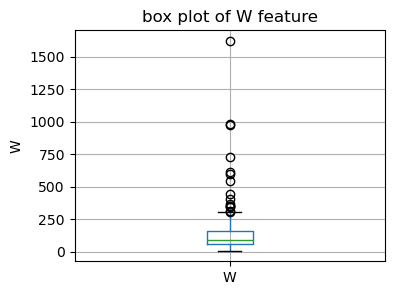

In [51]:
plt.figure(figsize=(4,3))
fig = df.boxplot(column='W')
fig.set_title("box plot of W feature")
fig.set_ylabel("W")

* plot histogram to check distribution

Text(0, 0.5, 'Grade')

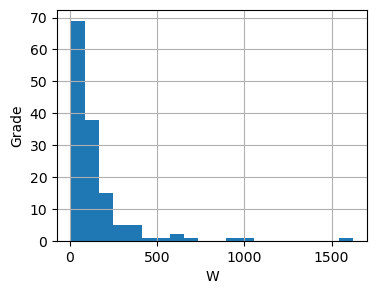

In [52]:
plt.figure(figsize=(4,3))
fig = df.W.hist(bins=20)
fig.set_xlabel('W')
fig.set_ylabel('Grade')

* find outliers for W variable using interquantile:

In [53]:
IQR = df.W.quantile(0.75) - df.W.quantile(0.25)
lower_fence = df.W.quantile(0.25) - (IQR * 3)
upper_fence = df.W.quantile(0.75) + (IQR * 3)
print("W outliers are values < {lower_boundary} or > {upper_boundary}".format(lower_boundary=lower_fence, upper_boundary=upper_fence))

W outliers are values < -243.80913185000003 or > 458.12601500000005


So the outliers for 'W' are values > 458.12601500000005

## Declare feature vector and target variable

In [104]:
X = df.loc[:, ~df.columns.isin(exclude_columns + [outcome_column])]
y = df[outcome_column]

## Split data into separate training and test set

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [106]:
X_train.shape, X_test.shape

((98, 570), (42, 570))

## Feature Engineering

In [107]:
X_train.dtypes

B      float64
C      float64
D      float64
G      float64
W      float64
        ...   
BOB    float64
BOH    float64
BOI    float64
BOK    float64
BOL    float64
Length: 570, dtype: object

### Engineering missing values

In [108]:
X_train.isnull().sum()

B      0
C      0
D      0
G      0
W      0
      ..
BOB    0
BOH    0
BOI    0
BOK    0
BOL    0
Length: 570, dtype: int64

In [109]:
X_test.isnull().sum()

B      0
C      0
D      0
G      0
W      0
      ..
BOB    0
BOH    0
BOI    0
BOK    0
BOL    0
Length: 570, dtype: int64

* I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers. 
I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfittin
* Here we seem to not have any missing values, but I will write the function anyways:g.

In [110]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for column in X.columns:
        col_median = X_train[column].median()
        df1[column].fillna(col_median, inplace=True)

In [111]:
X_train.isnull().sum()

B      0
C      0
D      0
G      0
W      0
      ..
BOB    0
BOH    0
BOI    0
BOK    0
BOL    0
Length: 570, dtype: int64

### Engineering outliers

In [112]:
def max_value(df3, variable, top):
    return np.where(df3[variable] > top, top, df3[variable])

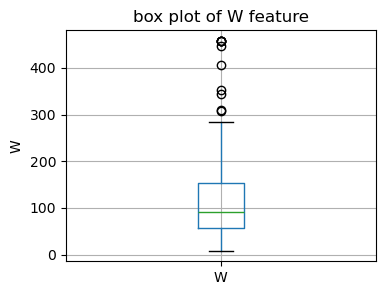

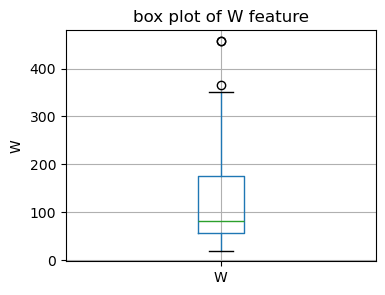

In [113]:
for df3 in [X_train, X_test]:
    df3['W'] = max_value(df3, 'W', 458.12601500000005)
    plt.figure(figsize=(4,3))
    fig = df3.boxplot(column='W')
    fig.set_title("box plot of W feature")
    fig.set_ylabel("W")

In [114]:
X_train.W.max(), X_test.W.max()

(458.12601500000005, 458.12601500000005)

## Feature Scaling

In [115]:
X_train.describe()

,B,C,D,G,W,AA,AE,AI,AK,AL,...,BNK,BNN,BNQ,BNT,BOA,BOB,BOH,BOI,BOK,BOL
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,0.039371,5.140394,0.515731,13.442228,128.669044,6.390775,101.579686,3.571712,0.356064,0.011414,...,2.034853,2.025450,2.045116,2.027596,2.691064,2.977381,2.546777,3.078726,2.837531,2.641043
std,0.049490,3.316424,0.154002,4.403977,114.950714,7.541837,91.055715,1.407400,0.105512,0.004633,...,0.690397,0.623459,0.646944,0.613520,1.591808,2.053165,1.143901,2.211362,1.841513,1.900782
min,0.009898,0.727778,0.077162,1.709613,8.165214,1.606417,17.476580,2.136448,0.130424,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.017131,2.592823,0.430786,10.290198,57.312926,2.797701,53.534771,2.832211,0.270145,0.008958,...,1.558132,1.572700,1.639367,1.614322,1.696855,1.886053,1.744418,1.869426,1.702521,1.759028
50%,0.024905,4.677026,0.507033,13.919471,91.620816,3.801594,83.769600,3.269604,0.356590,0.011249,...,1.934621,1.923712,1.923462,1.925388,2.261570,2.429850,2.189429,2.354186,2.349003,2.121522
75%,0.038821,7.060799,0.636275,16.693708,154.172779,6.734678,115.573239,3.650490,0.427148,0.013822,...,2.288721,2.374647,2.280790,2.252727,3.066472,3.403157,3.005660,3.165870,3.170049,2.857171
max,0.381233,18.101766,0.865217,20.851110,458.126015,63.400247,688.989125,11.507760,0.667206,0.031354,...,4.663791,4.306669,4.722399,4.633050,10.437106,14.601350,7.197992,12.067400,11.890139,13.833968


In [116]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [117]:
X_train = pd.DataFrame(X_train, columns = [cols])
X_test = pd.DataFrame(X_test, columns = [cols])

In [119]:
X_train.describe()

,B,C,D,G,W,AA,AE,AI,AK,AL,...,BNK,BNN,BNQ,BNT,BOA,BOB,BOH,BOI,BOK,BOL
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,0.079369,0.253978,0.556521,0.612941,0.267810,0.077425,0.125244,0.153155,0.420357,0.364017,...,0.282454,0.310116,0.280764,0.282847,0.179193,0.145381,0.249561,0.187824,0.168733,0.127867
std,0.133275,0.190884,0.195420,0.230075,0.255468,0.122048,0.135598,0.150182,0.196564,0.147767,...,0.188438,0.188546,0.173798,0.168872,0.168675,0.150953,0.184560,0.199809,0.169099,0.148106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.019477,0.107347,0.448731,0.448271,0.109227,0.019278,0.053697,0.074244,0.260293,0.285702,...,0.152337,0.173195,0.171762,0.169093,0.073842,0.065145,0.120106,0.078557,0.064510,0.059142
50%,0.040413,0.227308,0.545484,0.637874,0.185473,0.035524,0.098722,0.120918,0.421336,0.358761,...,0.255097,0.279348,0.248083,0.254714,0.133682,0.105126,0.191906,0.122358,0.123874,0.087387
75%,0.077888,0.364512,0.709485,0.782807,0.324490,0.082990,0.146083,0.161561,0.552783,0.440843,...,0.351745,0.415720,0.344076,0.344814,0.218973,0.176685,0.323598,0.195698,0.199267,0.144708
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
